In [5]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

In [6]:
!pip install -U -q PyDrive

In [7]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [8]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
# Cargando stmat.csv

In [10]:
downloaded = drive.CreateFile({'id':'1LhgjhduAhxKqyoTZ9mJmRXmKFi8AlJ8_'})
downloaded.GetContentFile('stmat.csv')

In [11]:
datos = pd.read_csv('stmat.csv',sep=';',encoding='latin-1')

## Agrupando datos

In [12]:
Tab=pd.crosstab(datos.school,datos.sex)
Tab.index=['Gabriel Pereira','Mousinho da Silveira']
Tab.columns=['Mujeres','Hombres']
Tab

,Mujeres,Hombres
Gabriel Pereira,183,166
Mousinho da Silveira,25,21


In [13]:
pd.crosstab(datos.school,datos.sex,margins=True)

sex,F,M,All
school,,,
GP,183,166,349
MS,25,21,46
All,208,187,395


In [14]:
Tab=pd.crosstab(datos.school,datos.sex,margins=True)
Tab.index=['Gabriel Pereira','Mousinho da Silveira','Total']
Tab.columns=['Mujeres','Hombres','Total']
Tab

,Mujeres,Hombres,Total
Gabriel Pereira,183,166,349
Mousinho da Silveira,25,21,46
Total,208,187,395


## Contraste de Hipótesis de Independencia

In [15]:
from scipy.stats import chi2_contingency

- **H0: Existe independencia entre las escuelas y el sexo de los estudiantes**
- **Ha: Existe dependencia entre las escuelas y el sexo de los estudiantes**

In [16]:
Tab=pd.crosstab(datos.school,datos.sex)
Tab.index=['Gabriel Pereira','Mousinho da Silveira']
Tab.columns=['Mujeres','Hombres']
Tab

,Mujeres,Hombres
Gabriel Pereira,183,166
Mousinho da Silveira,25,21


In [17]:
c, p, dof, expected = chi2_contingency(Tab)
print('El p-valor es',p)

El p-valor es 0.9305999299762074


In [18]:
Tab=pd.crosstab(datos.school,datos.sex,normalize='index')
Tab.index=['Gabriel Pereira','Mousinho da Silveira']
Tab.columns=['Mujeres','Hombres']
100*round(Tab,4)

,Mujeres,Hombres
Gabriel Pereira,52.44,47.56
Mousinho da Silveira,54.35,45.65


- **H0: Existe independencia entre el sexo y la calidad de su relación familiar**
- **Ha: Existe dependencia entre el sexo y y la calidad de su relación familiar**

In [19]:
Tab=pd.crosstab(datos.sex,datos.famrel)
Tab.index=['Mujeres','Hombres']
Tab.columns=['Very Bad','Bad','Regular','Good','Excellent']
Tab

,Very Bad,Bad,Regular,Good,Excellent
Mujeres,5,9,38,107,49
Hombres,3,9,30,88,57


In [20]:
c, p, dof, expected= chi2_contingency(Tab)
print('El p-valor es',p)

El p-valor es 0.5939654443927852


In [21]:
Tab=pd.crosstab(datos.sex,datos.famrel,normalize='index')
Tab.index=['Mujeres','Hombres']
Tab.columns=['Very Bad','Bad','Regular','Good','Excellent']
100*round(Tab,4)

,Very Bad,Bad,Regular,Good,Excellent
Mujeres,2.4,4.33,18.27,51.44,23.56
Hombres,1.6,4.81,16.04,47.06,30.48


- **H0: Existe independencia entre el sexo y el nivel de consumo de alcohol los fines de semana**
- **Ha: Existe dependencia entre el sexo y el nivel de consumo de alcohol los fines de semana**

In [22]:
Tab=pd.crosstab(datos.sex,datos.Walc)
Tab.index=['Mujeres','Hombres']
Tab.columns=['Very Low','Low','Regular','High','Very High']
Tab

,Very Low,Low,Regular,High,Very High
Mujeres,94,51,45,14,4
Hombres,57,34,35,37,24


In [23]:
c, p, dof, expected = chi2_contingency(Tab)
print('El p-valor es',p)

El p-valor es 1.515841945739304e-07


In [24]:
Tab=pd.crosstab(datos.sex,datos.Walc,normalize='index')
Tab.index=['Mujeres','Hombres']
Tab.columns=['Very Low','Low','Regular','High','Very High']
100*round(Tab,4)

,Very Low,Low,Regular,High,Very High
Mujeres,45.19,24.52,21.63,6.73,1.92
Hombres,30.48,18.18,18.72,19.79,12.83


## Contraste de Hipótesis de Normalidad

In [25]:
import statsmodels.api as sm
from scipy import stats

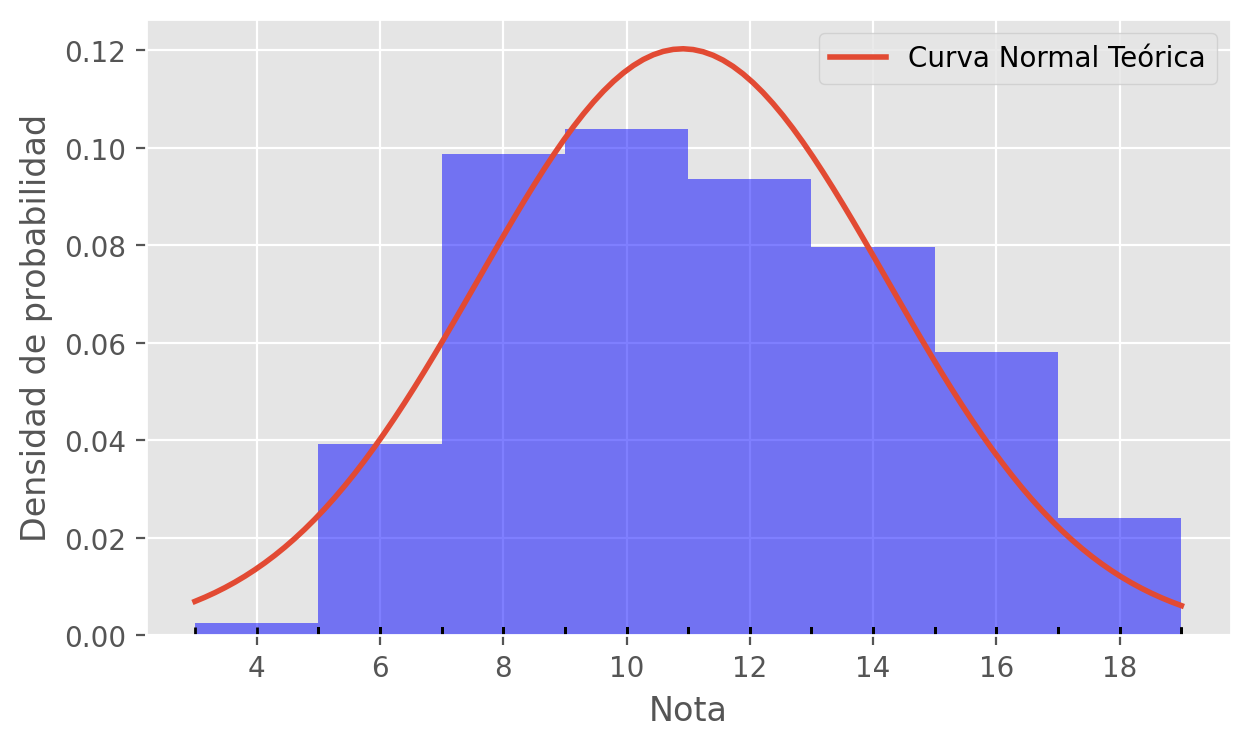

In [26]:
val=datos.G1
mu, sigma = stats.norm.fit(val)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(val), max(val), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Curva Normal Teórica')
ax.hist(x=val, density=True, bins=8, color="blue", alpha=0.5)
ax.plot(val, np.full_like(val, -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Nota')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

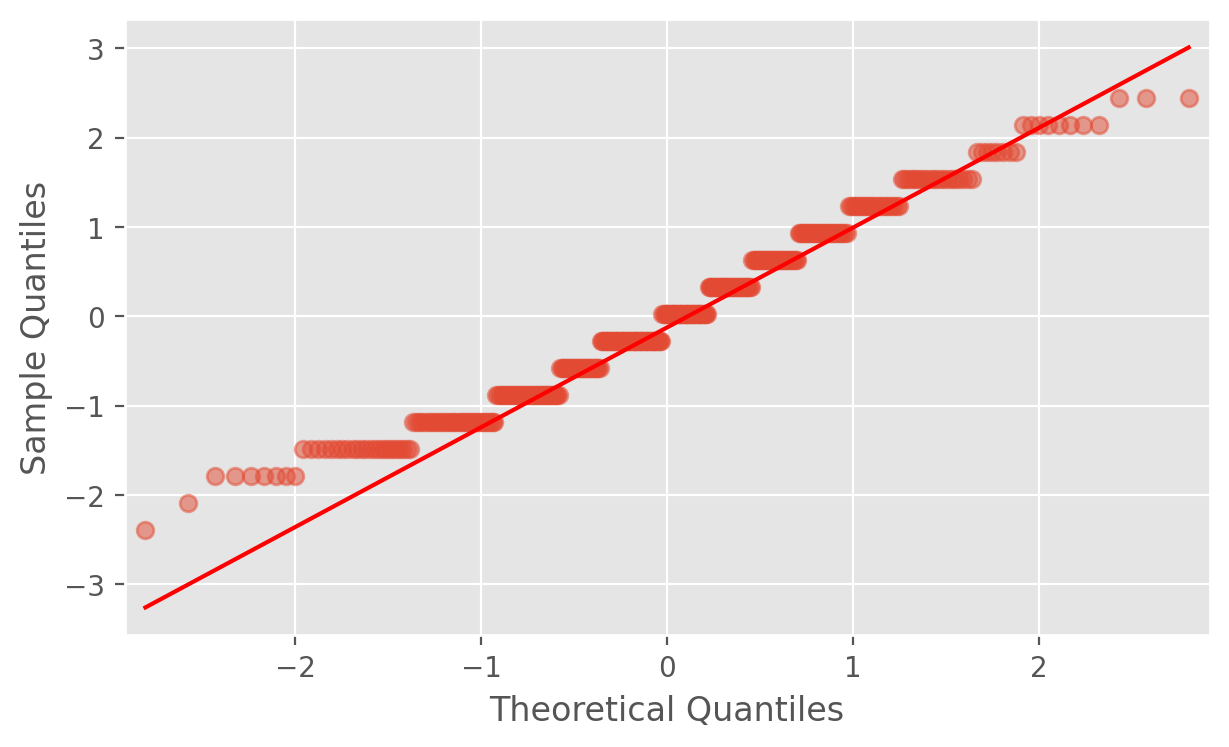

In [27]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    val,
    fit   = True,
    line  = 'q',
    alpha = 0.5,
    lw    = 2,
    ax    = ax
);

In [28]:
from scipy.stats import shapiro

- **H0: La distribución de las notas G1 de los estudiantes es normal**
- **Ha: La distribución de las notas G1 de los estudiantes no es normal**

In [29]:
val=datos.G1

In [30]:
stats.shapiro(val).pvalue

2.4554813080612803e-06

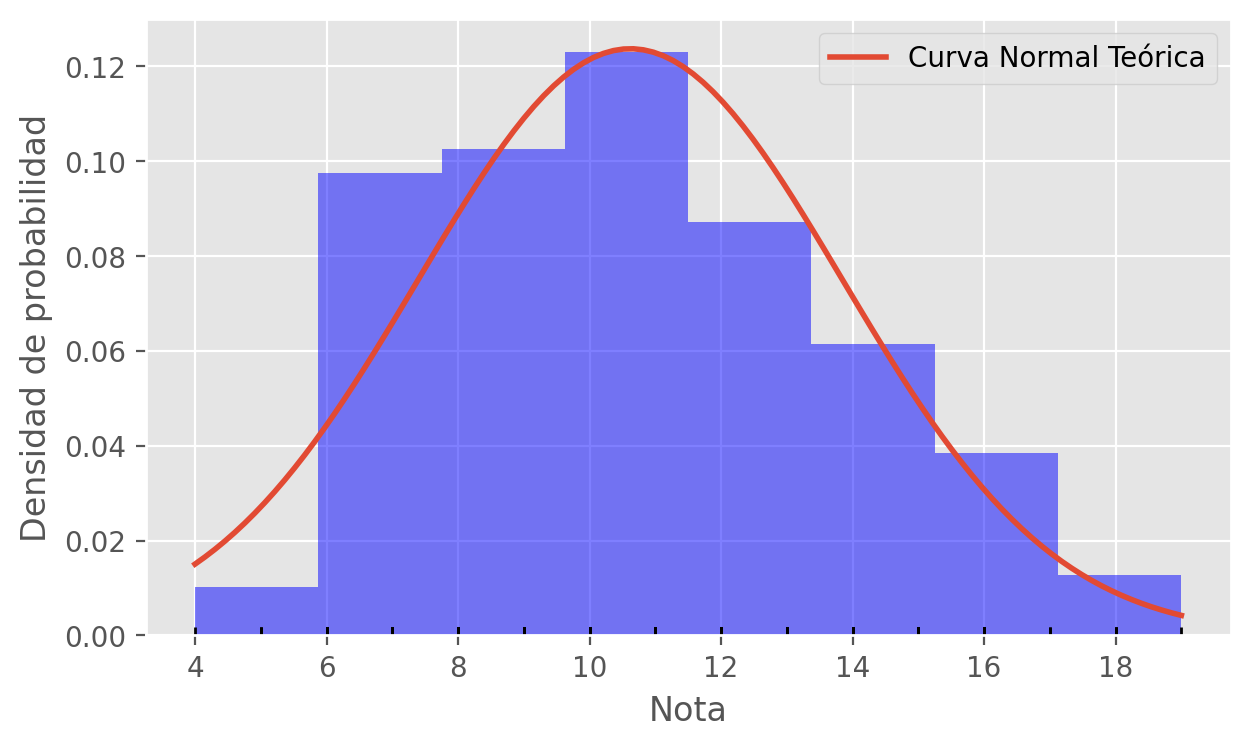

In [31]:
val=datos[datos.sex=='F'].G1
mu, sigma = stats.norm.fit(val)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(val), max(val), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Curva Normal Teórica')
ax.hist(x=val, density=True, bins=8, color="blue", alpha=0.5)
ax.plot(val, np.full_like(val, -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Nota')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

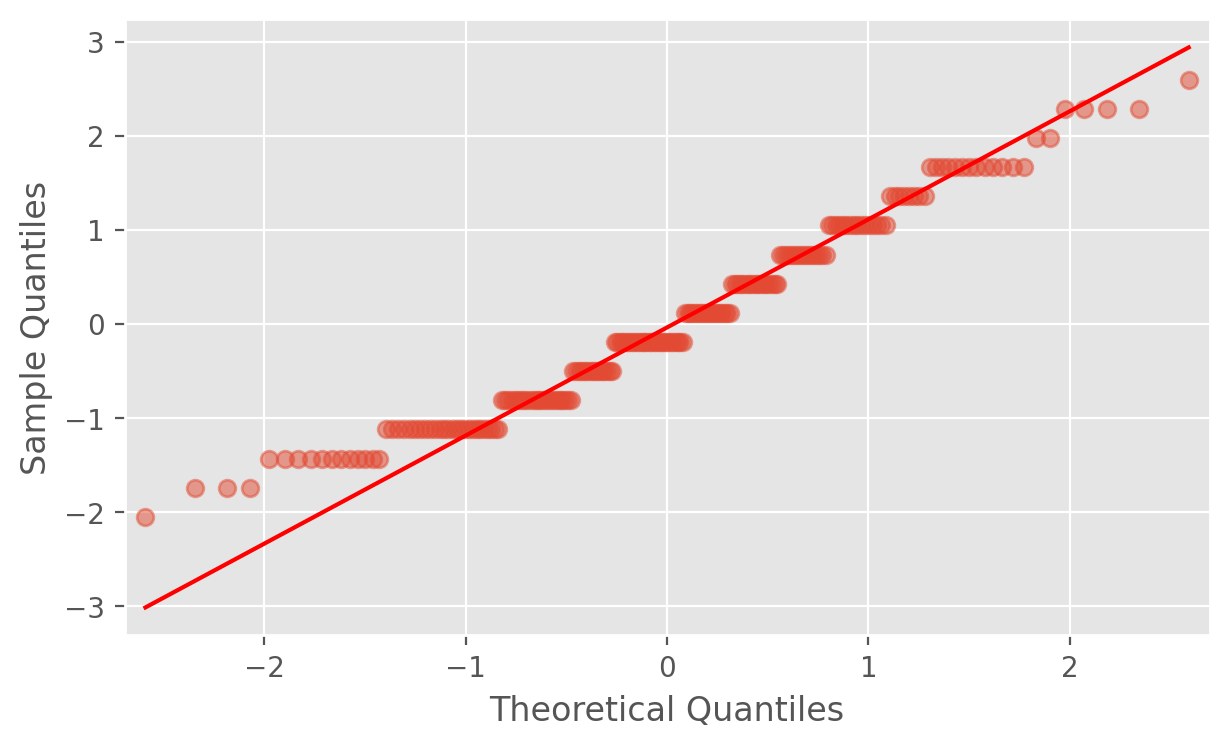

In [32]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    val,
    fit   = True,
    line  = 'q',
    alpha = 0.5,
    lw    = 2,
    ax    = ax
);

**Shapiro Test**

- **H0: La distribución de las notas G1 de los estudiantes mujeres es normal**
- **Ha: La distribución de las notas G1 de los estudiantes mujeres no es normal**

In [33]:
p=stats.shapiro(val).pvalue

In [34]:
alpha = 0.05
if p > alpha:
	print('La distribución es normal (Fallo al rechazar H0)')
else:
	print('La distribución no es normal (Se rechazó H0)')

La distribución no es normal (Se rechazó H0)


**Prueba D’Agostino’s K^2**

In [35]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

In [36]:

seed(1)
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('La distribución es normal (Fallo al rechazar H0)')
else:
	print('La distribución no es normal (Se rechazó H0)')

Statistics=0.102, p=0.950
La distribución es normal (Fallo al rechazar H0)


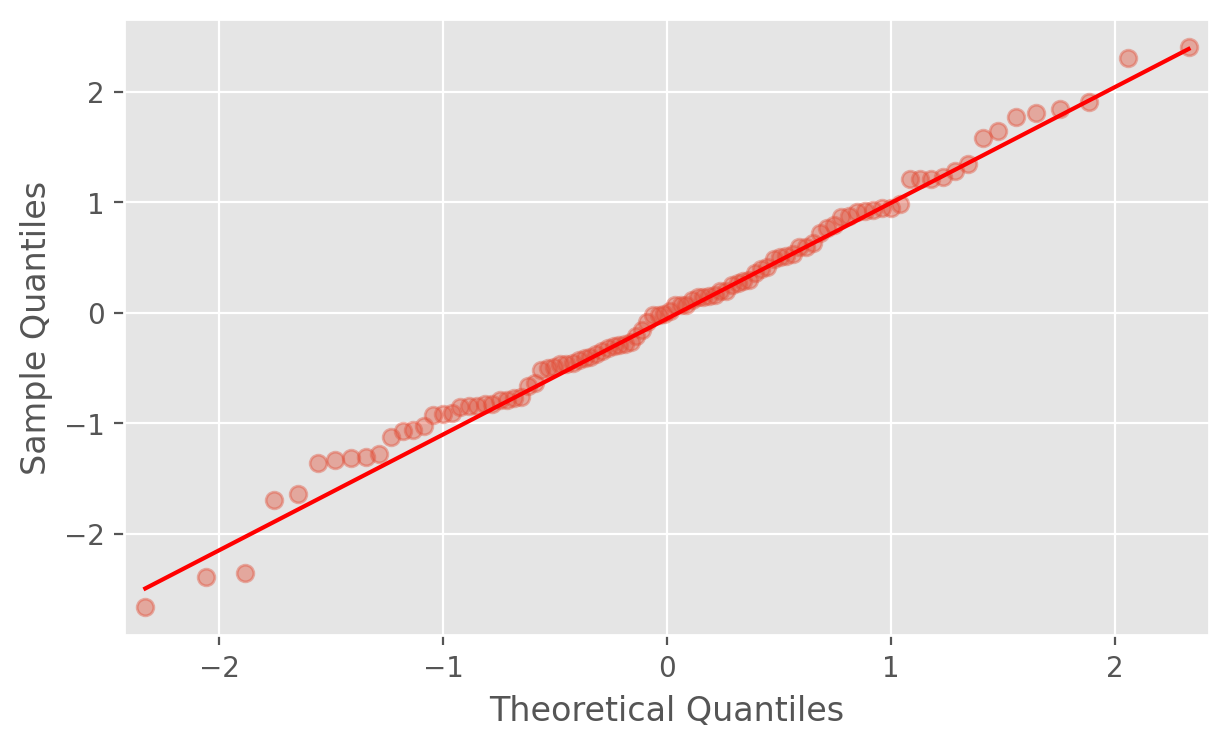

In [37]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
);

## Bootstrapping

In [38]:
datos = np.array([
            81.372918, 25.700971, 4.942646, 43.020853, 81.690589, 51.195236,
            55.659909, 15.153155, 38.745780, 12.610385, 22.415094, 18.355721,
            38.081501, 48.171135, 18.462725, 44.642251, 25.391082, 20.410874,
            15.778187, 19.351485, 20.189991, 27.795406, 25.268600, 20.177459,
            15.196887, 26.206537, 19.190966, 35.481161, 28.094252, 30.305922
        ])

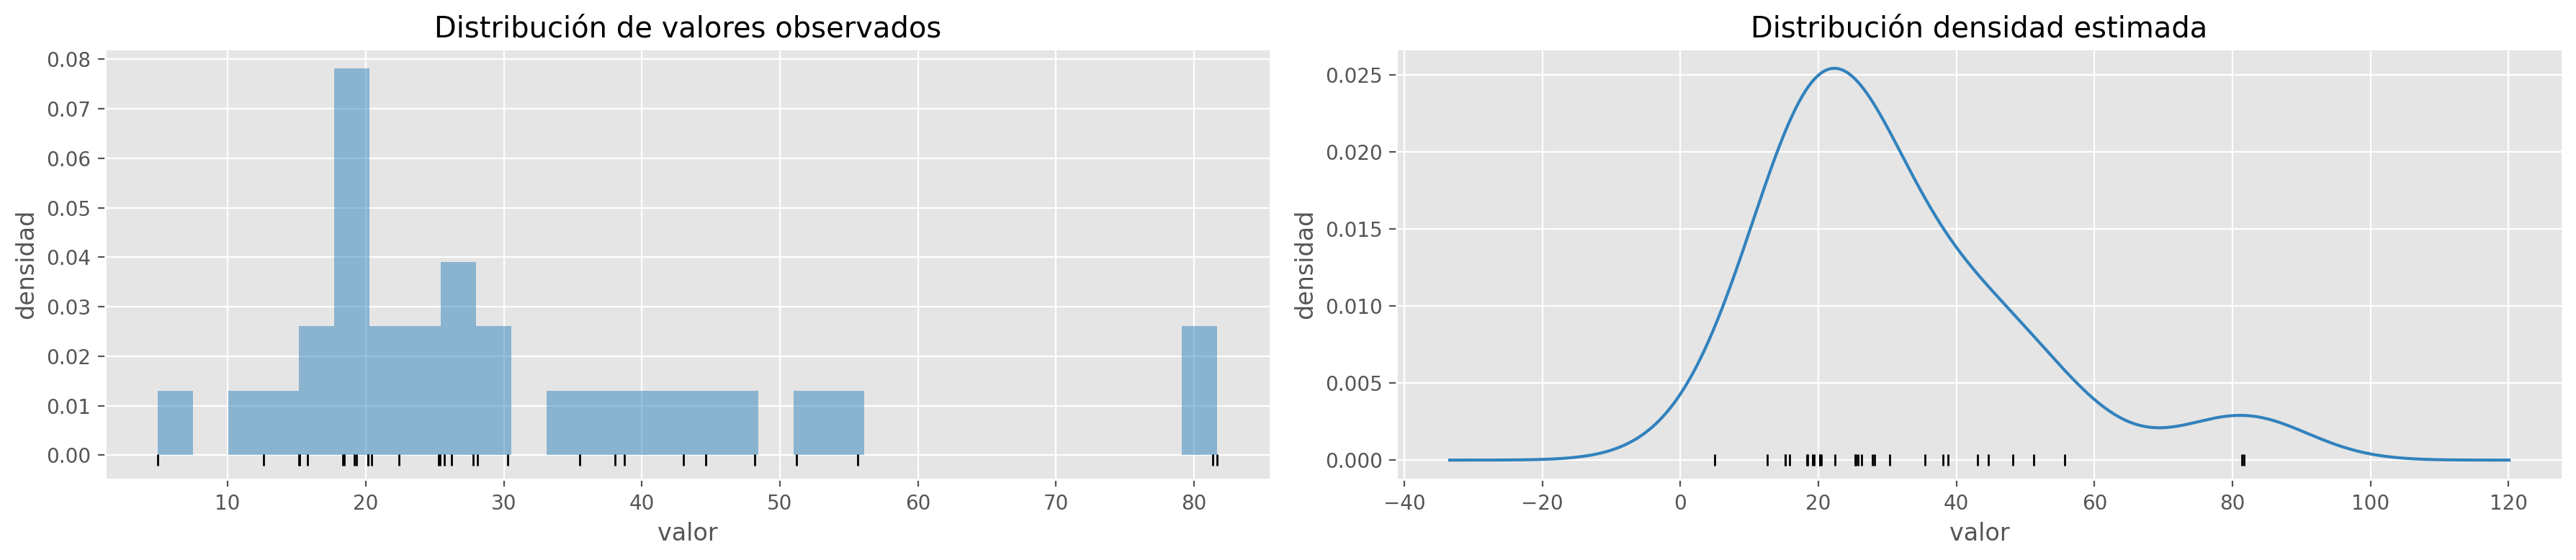

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

axs[0].hist(datos, bins=30, density=True, color='#3182bd', alpha=0.5)
axs[0].plot(datos, np.full_like(datos, -0.001), '|k', markeredgewidth=1)
axs[0].set_title('Distribución de valores observados')
axs[0].set_xlabel('valor')
axs[0].set_ylabel('densidad')


pd.Series(datos).plot.kde(ax=axs[1],color='#3182bd')
axs[1].plot(datos, np.full_like(datos, 0), '|k', markeredgewidth=1)
axs[1].set_title('Distribución densidad estimada')
axs[1].set_xlabel('valor')
axs[1].set_ylabel('densidad')

fig.tight_layout();

## Estimación de parametros

In [40]:
def calcular_estadistico(x):
    # Función para calcular el estadístico de interés.
    estadistico = np.mean(x)
    return(estadistico)


def bootstraping(x, fun_estadistico, n_iteraciones=9999):
    # Función para calcular el valor del estadístico en múltiples muestras generadas
    # mediante muestreo repetido con reposición (bootstrapping).
    n = len(x)
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)

    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)

    return dist_boot

In [41]:
dist_boot = bootstraping(
                x = datos,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:00<00:00, 13251.72it/s]


In [42]:
dist_boot

array([31.85166747, 34.4883474 , 32.2086956 , ..., 32.9315229 ,
       31.5057693 , 31.29914407])

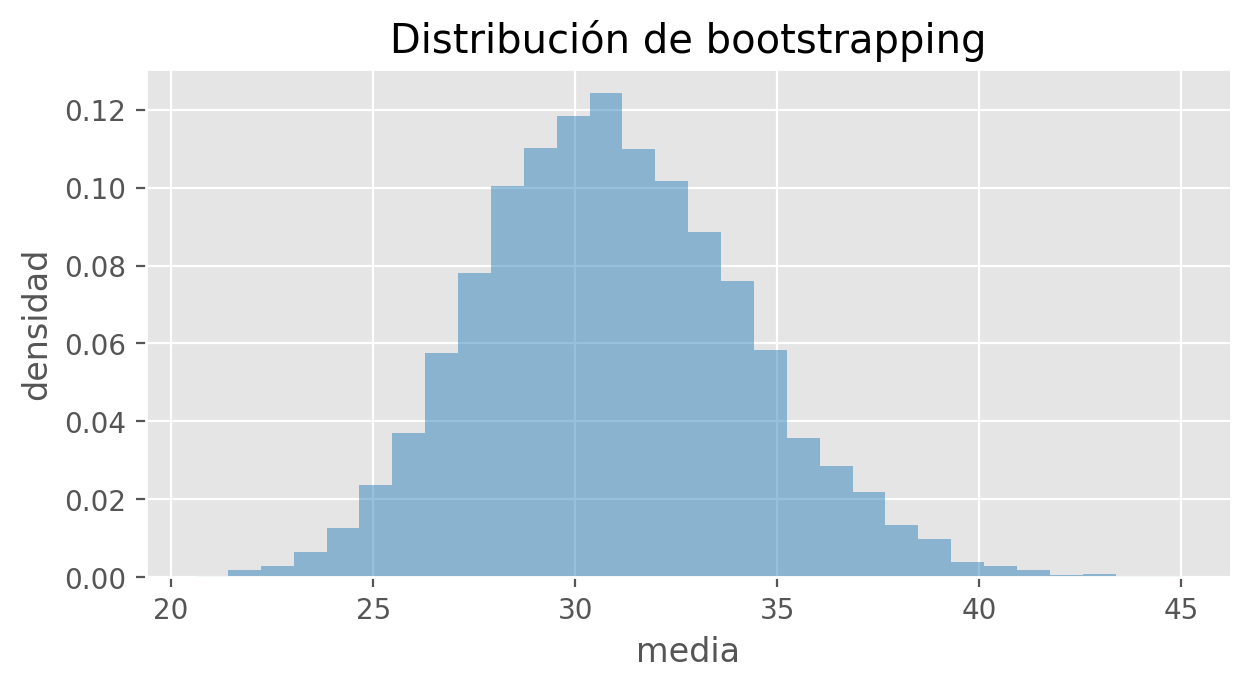

In [43]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.set_title('Distribución de bootstrapping')
ax.set_xlabel('media')
ax.set_ylabel('densidad');

In [44]:
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[24.929255   37.88983657]


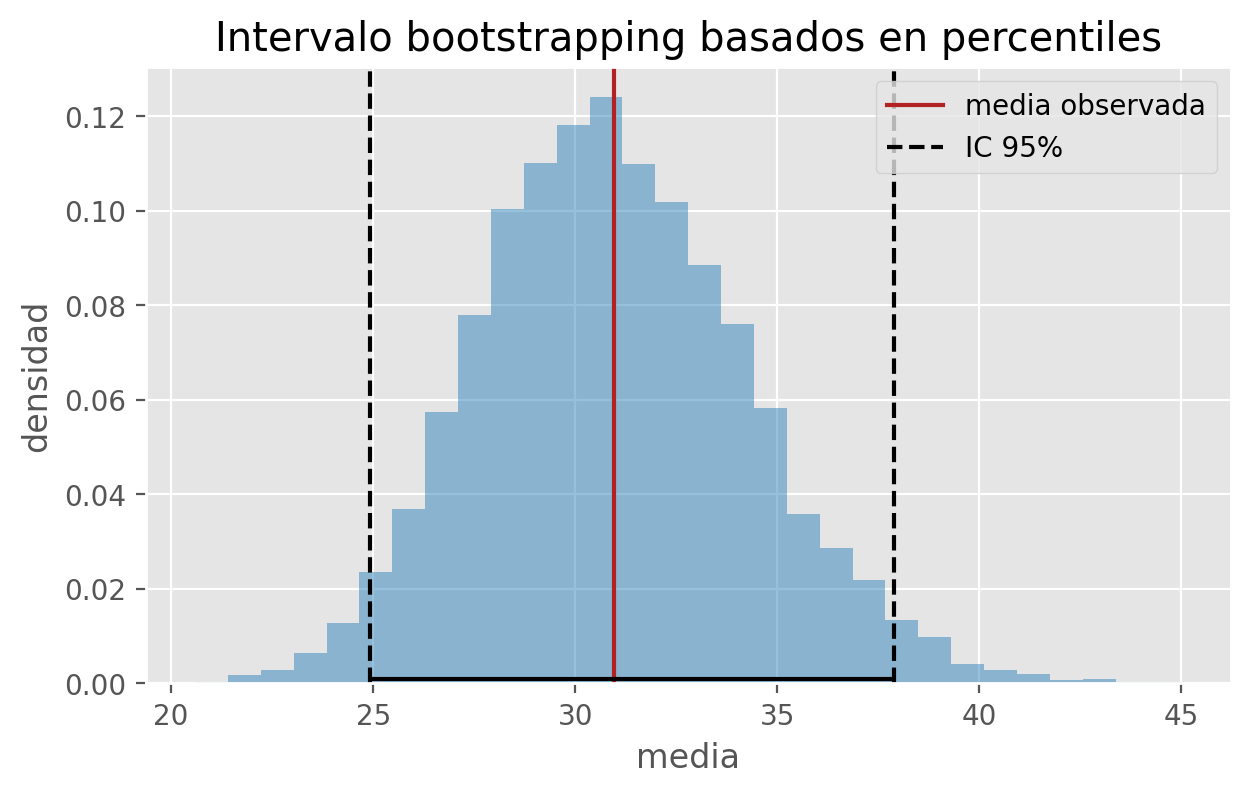

In [45]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=datos.mean(), color='firebrick', label='media observada')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.set_title('Intervalo bootstrapping basados en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();

## Aplicación con datos

In [46]:
df = pd.read_csv('stmat.csv',sep=';',encoding='latin-1')

In [47]:
datos=df.G1

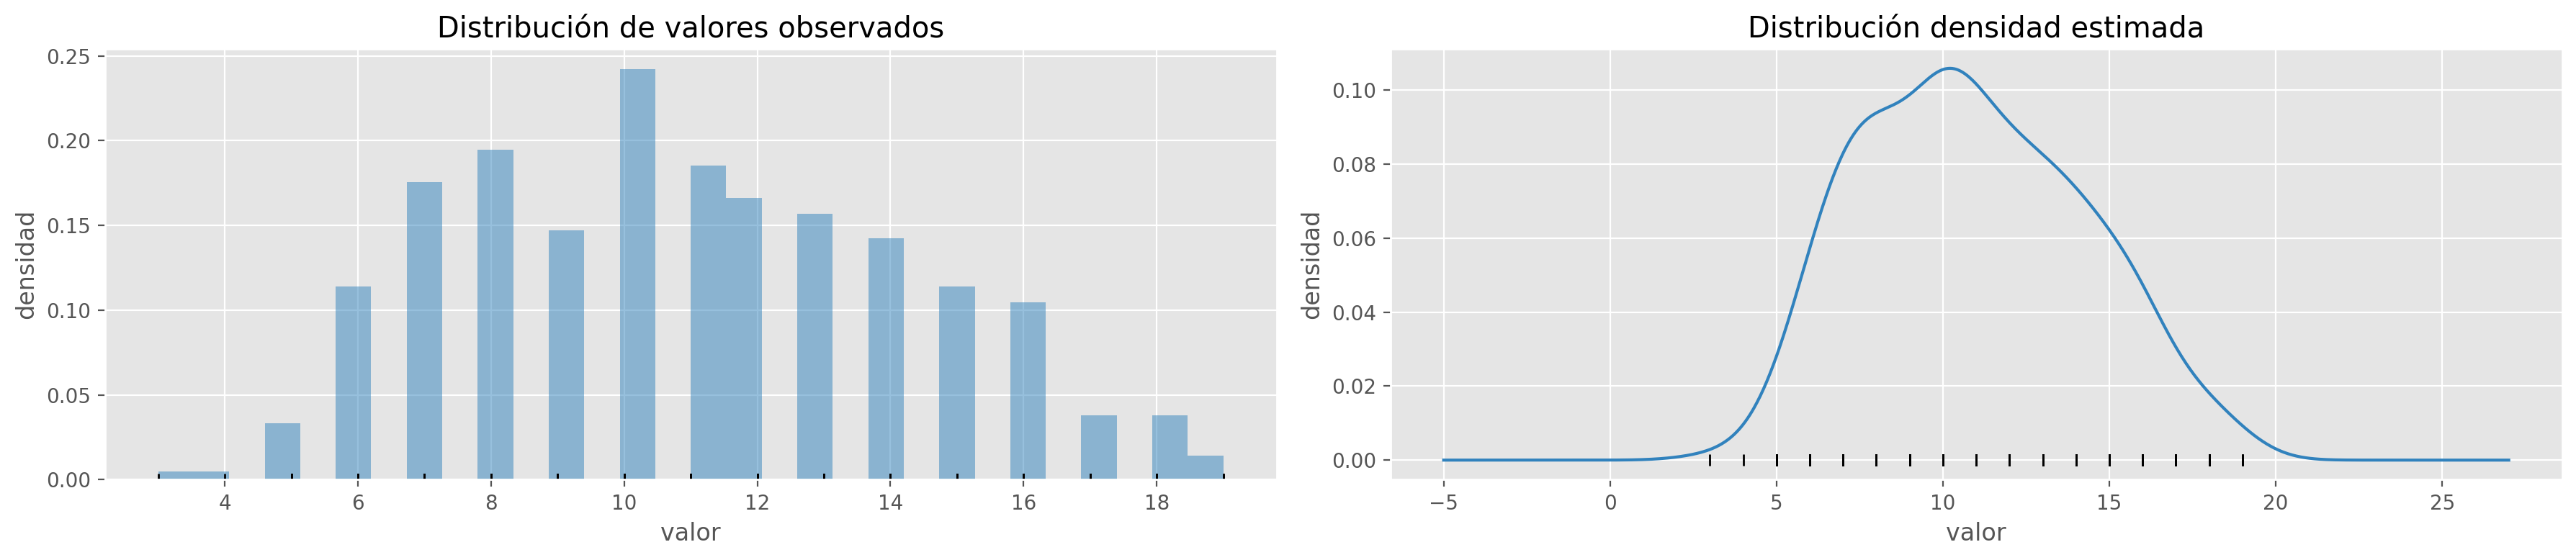

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

axs[0].hist(datos, bins=30, density=True, color='#3182bd', alpha=0.5)
axs[0].plot(datos, np.full_like(datos, -0.001), '|k', markeredgewidth=1)
axs[0].set_title('Distribución de valores observados')
axs[0].set_xlabel('valor')
axs[0].set_ylabel('densidad')


pd.Series(datos).plot.kde(ax=axs[1],color='#3182bd')
axs[1].plot(datos, np.full_like(datos, 0), '|k', markeredgewidth=1)
axs[1].set_title('Distribución densidad estimada')
axs[1].set_xlabel('valor')
axs[1].set_ylabel('densidad')

fig.tight_layout();

In [49]:
dist_boot = bootstraping(
                x = datos,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:02<00:00, 4382.64it/s]


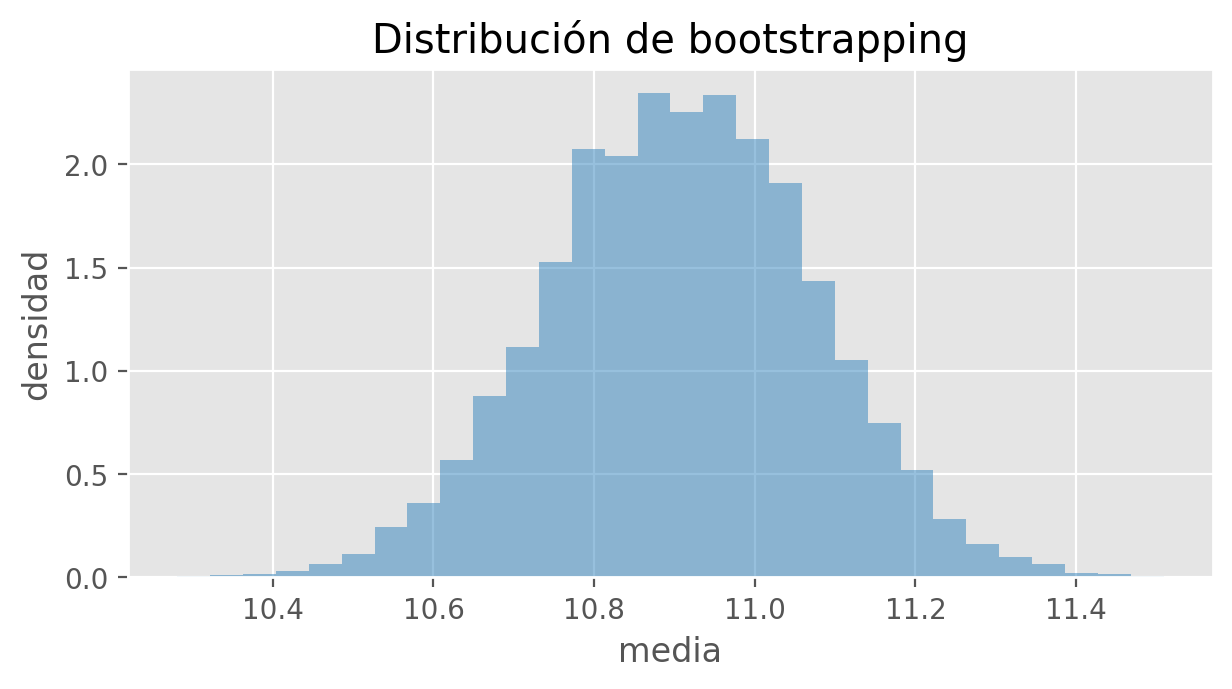

In [50]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.set_title('Distribución de bootstrapping')
ax.set_xlabel('media')
ax.set_ylabel('densidad');

In [51]:
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[10.58481013 11.2278481 ]


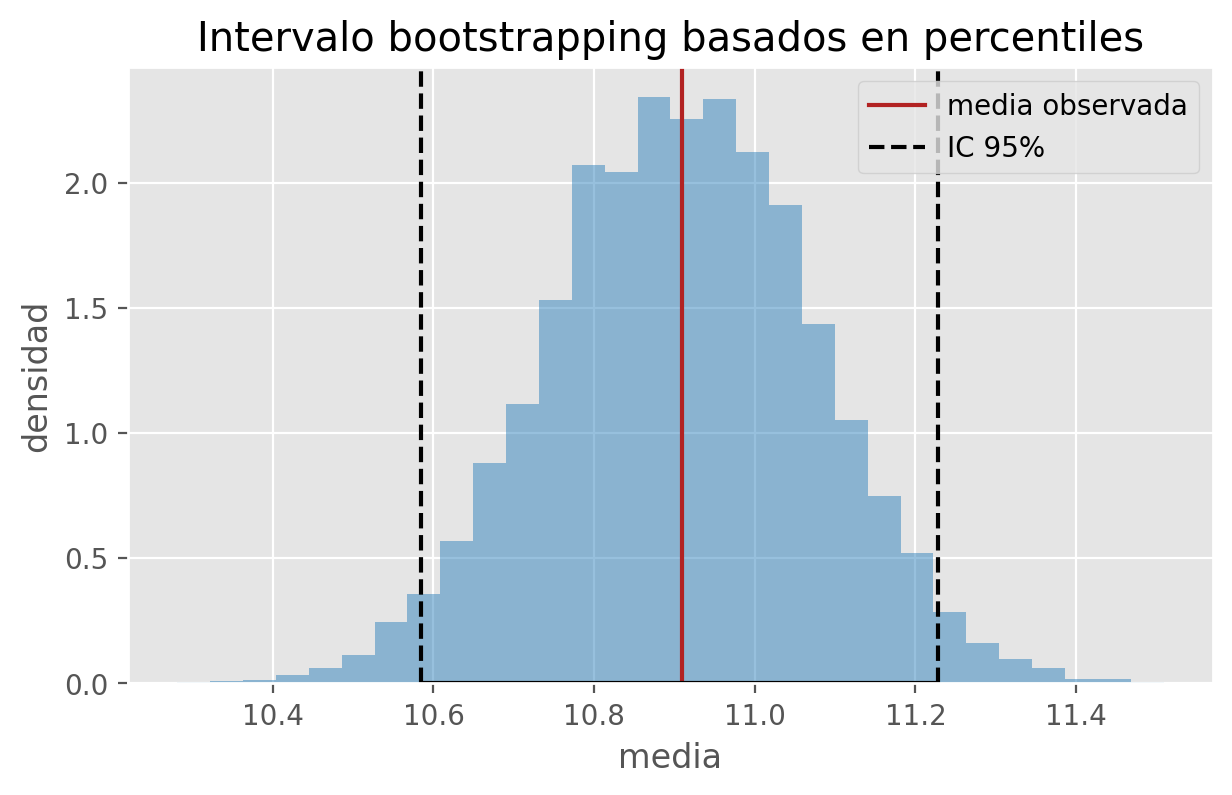

In [52]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=datos.mean(), color='firebrick', label='media observada')
ax.axvline(x=cuantiles[0], color='black', linestyle='--', label='IC 95%')
ax.axvline(x=cuantiles[1], color='black', linestyle='--')
ax.hlines(y=0.001, xmin=cuantiles[0], xmax=cuantiles[1], color='black')
ax.set_title('Intervalo bootstrapping basados en percentiles')
ax.set_xlabel('media')
ax.set_ylabel('densidad')
ax.legend();

In [53]:
datos.mean()

10.90886075949367

In [54]:
df.groupby(by='school')['G3'].describe()

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
GP,349.0,10.489971,4.625397,0.0,8.0,11.0,14.00,20.0
MS,46.0,9.847826,4.237229,0.0,8.0,10.0,12.75,19.0


In [55]:
dif_observada = (df.G3[df.school == 'GP'].mean()-df.G3[df.school == 'MS'].mean())

print(f"Diferencia de medias observada: {dif_observada}")

Diferencia de medias observada: 0.6421452597483501


In [56]:
def bootstraping_2_grupos(x1, x2, fun_estadistico, n_iteraciones=9999):
    n1 = len(x1)
    n2 = len(x2)
    pool = np.hstack((x1, x2))
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)

    for i in tqdm(range(n_iteraciones)):
        # Se crea una nueva muestra
        resample = np.random.choice(pool, size=n1+n2, replace=True)
        # Se reparten las observaciones en dos grupos y se calcula el estadístico
        estadistico_1 = fun_estadistico(resample[:n1])
        estadistico_2 = fun_estadistico(resample[n1:])
        # Diferencia entre estadísticos
        dist_boot[i]  = estadistico_1 - estadistico_2

    return dist_boot

In [57]:
dist_boot = bootstraping_2_grupos(
                x1 = df.G3[df.school == 'GP'],
                x2 = df.G3[df.school == 'MS'],
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:02<00:00, 3952.47it/s]


- **H0: La estimación por bootstrapping coincide con la distribución observada**
- **Ha: La estimación por bootstrapping no coincide con la distribución observada**

In [58]:
p_value = (sum(np.abs(dist_boot) > np.abs(dif_observada)))/len(dist_boot)
print('El p-valor es',p_value)

El p-valor es 0.3714371437143714
